1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [63]:
from scipy.stats import poisson
import numpy as np
import random
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import pickle
from scipy import optimize

x0 = 15 #number of hurricanes at 2005

#poisson distribution with average 6.3 hurrinaces per year
x_poisson=poisson.rvs(6.3,size= 2000,random_state=0)
#last 2000 years, happened hurricanes in each year
mu=x_poisson.mean()
# mu_d=np.var(x_poisson)
print("\n\n mu:",mu,"\n\n")
# print("\n\n",mu_d,"\n\n")


sigma = np.sqrt(mu)
print("\n\n sigma:",sigma,"\n\n")
#standard diviation
# plt.imshow(x_poisson)

z=abs(x0-mu)/sigma


print("\n\n z0:",z,"\n\n")

probability_z=stats.norm.cdf(-z) + (1-stats.norm.cdf(z))


print("\n\n Probability_z2:",probability_z,"\n\n")




 mu: 6.2005 




 sigma: 2.4900803199896986 




 z0: 3.5338217523988957 




 Probability_z2: 0.00040959720932453886 




2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$



 T value: -3.786997938137629 



 P value: 0.004302464132864604 



Text(0.5, 0, 't value')

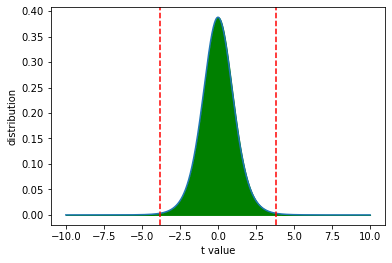

In [38]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_n = np.sqrt(np.var(pre,ddof=1))
post_n = np.sqrt(np.var(post,ddof=1))

sigma = np.sqrt(((pre_n**2)+(post_n**2))/2)

pre_mean=np.mean(pre)
post_mean=np.mean(post)

number=len(post) #n
T=((pre_mean-post_mean)/(sigma*(np.sqrt(2/number))))
print("\n\n T value:",T,"\n")
P = stats.t.cdf(T,number-1)+(1-stats.t.cdf(-T,number-1))
print("\n\n P value:",P,"\n")

f_x=np.linspace(-10,10,1000)
t_value = stats.t.pdf(f_x,number-1)


plt.plot(f_x,t_value)
plt.fill_between(f_x,t_value,where=(np.abs(f_x) > 0),color='g',alpha=1)
plt.axvline(T, linestyle = '--', color='r')
plt.axvline(-T,linestyle = '--', color='r')
plt.ylabel("distribution")
plt.xlabel("t value")

# plt.fill_between(f_x, t_value, where=(np.abs(f_x) > np.abs(0)), color='blue', alpha=0.25)
# plt

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

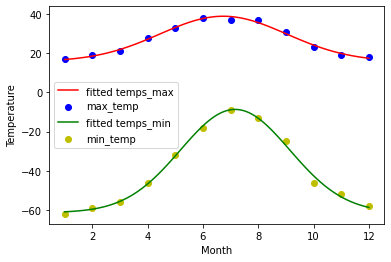

In [64]:
max_temp=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

x=np.linspace(1,12,120)

def curve_func(x,month,value,A,off):
    return A * stats.norm.pdf(x,loc=month,scale=value)+off

max_opt, max_cov = optimize.curve_fit(curve_func, months, max_temp, p0=[6, 1, 1, 0])
plt.plot(x, curve_func(x, max_opt[0], max_opt[1], max_opt[2], max_opt[3]), color='r', label='fitted temps_max')

plt.scatter(months, max_temp, label='max_temp', color="b")
min_opt, min_cov = optimize.curve_fit(curve_func, months, min_temp, p0=[6, 1, 1, 0])
plt.plot(x, curve_func(x, min_opt[0], min_opt[1], min_opt[2], min_opt[3]), color='g', label='fitted temps_min')
plt.scatter(months, min_temp, label='min_temp', color="y")
plt.ylabel('Temperature')
plt.xlabel('Month')
plt.legend()
plt.show()

#the fit is reasonable


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
  0.08333333]


 len residuals: 11131


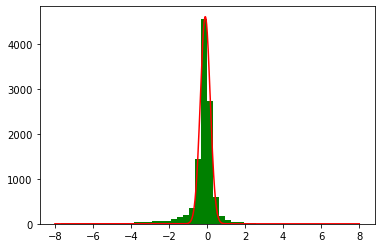

In [45]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename = open('data/residuals_261.pkl','rb')
residual = (pickle.load(filename).item())['residuals']
filename.close()
print(residual)
print("\n\n len residuals:",len(residual))
number_of_bins=50

number,bins,_ = plt.hist(residual,bins=number_of_bins,range=(-8,8),color="g")
center_bins = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

def fit(x,S,m,value):
    return S* np.exp((-1*((x-m)**2))/(2*value))

p_opt,p_cov = optimize.curve_fit(fit,center_bins,number,p0=[1,0,1],full_output=False)

x = np.linspace(-8,8,1000)
plt.plot(x,fit(x,p_opt[0],p_opt[1],p_opt[2]),color="r")
plt.show()



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

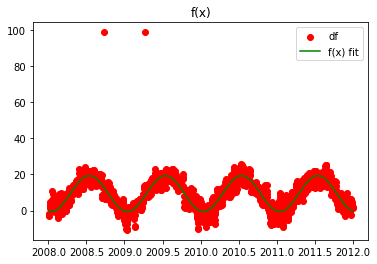

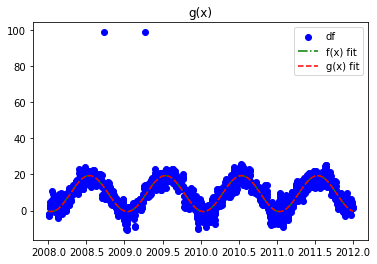


 a= -9.982183881231062 
 b= 1.0014440576722103 
 c= -5.9047271750555055 
 d= 9.398124918050614

 RSS_f(x): 34359.85859996652 


 RSS_g(x): 34352.794053704085 



0.98174374519885

In [78]:
# !wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

filename = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=' ', names = ['years', 'temp'] )
df = filename[(filename['years']<=2012) & (filename['years']>=2008)]
filename
df

time = df['years']
temp = df['temp']

def fx(time,a,b,c):
    return a*np.cos(2*np.pi*time+b)+c
def gx(time,a,b,c,d):
    return a*np.cos(2*np.pi*b*time+c)+d
f_opt,f_cov = optimize.curve_fit(fx,time,temp,p0=[1,1,1])

plt.title('f(x)')
plt.scatter(time,temp,label='df',color='r')
plt.plot(time,fx(time,f_opt[0],f_opt[1],f_opt[2]),label='f(x) fit',color='g')
plt.legend()
plt.show()

g_opt,g_cov=optimize.curve_fit(gx,time,temp,p0=[1,1,1,1])
plt.title('g(x)')
plt.scatter(time,temp,label='df',color='b')
plt.plot(time,fx(time,f_opt[0],f_opt[1],f_opt[2]),label='f(x) fit',color='g',ls='-.')

plt.plot(time, gx(time, g_opt[0], g_opt[1], g_opt[2], g_opt[3]), label = 'g(x) fit', color = 'r', ls='--')
plt.legend()
plt.show()

print('\n a=',g_opt[0],'\n b=',g_opt[1],'\n c=',g_opt[2],'\n d=',g_opt[3])

res_f = temp - fx(time,*f_opt)
ssr_fx=np.sum(res_f**2)

res_g=temp-gx(time,*g_opt)
ssr_gx=np.sum(res_g**2)

print("\n RSS_f(x):",ssr_fx,"\n")
print("\n RSS_g(x):",ssr_gx,"\n")

number_of_params_f = 3
number_of_params_g = 4

alpha = 0.05




def ftest(ssr_1,ssr_2,ndof_1,ndof_2,nbins,verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return pval
number_count=number_of_params_f+number_of_params_g
ftest(ssr_fx,ssr_gx,number_of_params_f,number_of_params_g,number_count,verbose=True)